In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from dython.nominal import associations, identify_nominal_columns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, RocCurveDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
pd.options.display.max_columns=None

ModuleNotFoundError: No module named 'dython'

In [2]:
df_raw = pd.read_csv('data/internet_service_churn.csv')

In [3]:
df = df_raw.copy()

In [4]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [8]:
df.shape

(72274, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['id'].duplicated().sum()

0

<h3>EDA</h3>

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


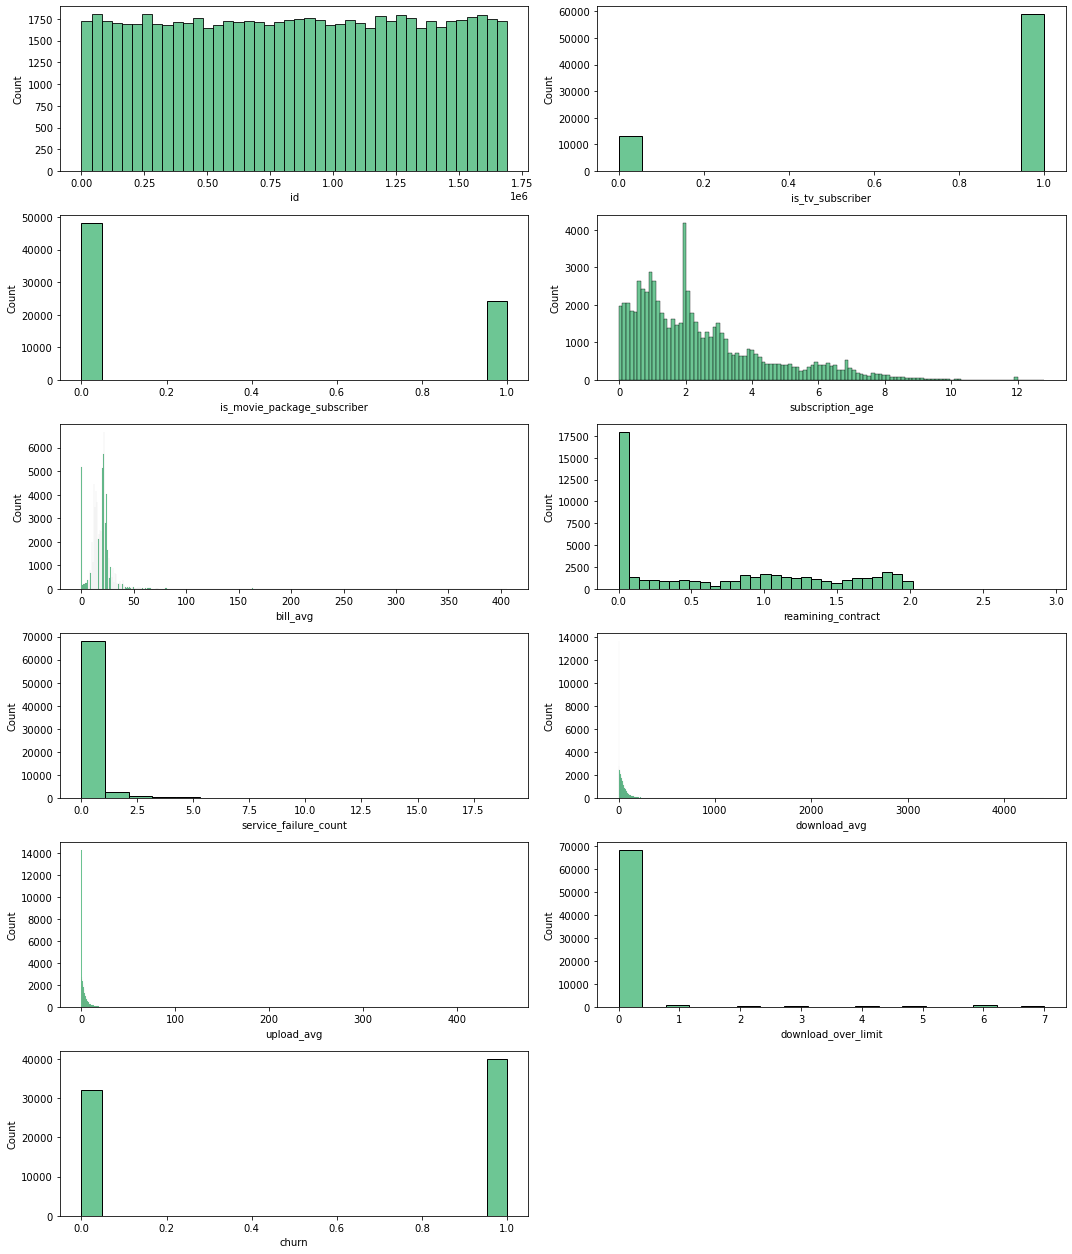

In [12]:
num = list(df.describe().columns)
plt.figure(figsize=(15, 20))
for i in range(0, len(num)):
    plt.subplot(7, 2, i+1)
    sns.histplot(x=df[num[i]], color='mediumseagreen')
    plt.xlabel(num[i])
    plt.tight_layout()

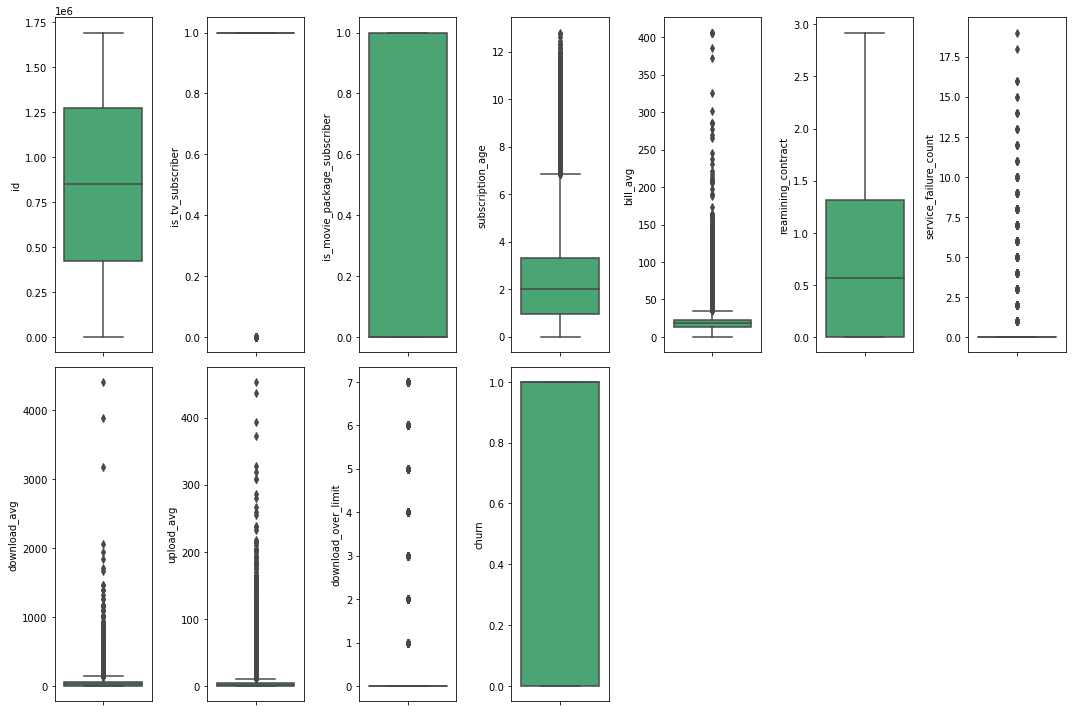

In [14]:
num = list(df.describe().columns)
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df[num[i]], color='mediumseagreen', orient='v')
    plt.tight_layout()

<h3>Target Analysis</h3>

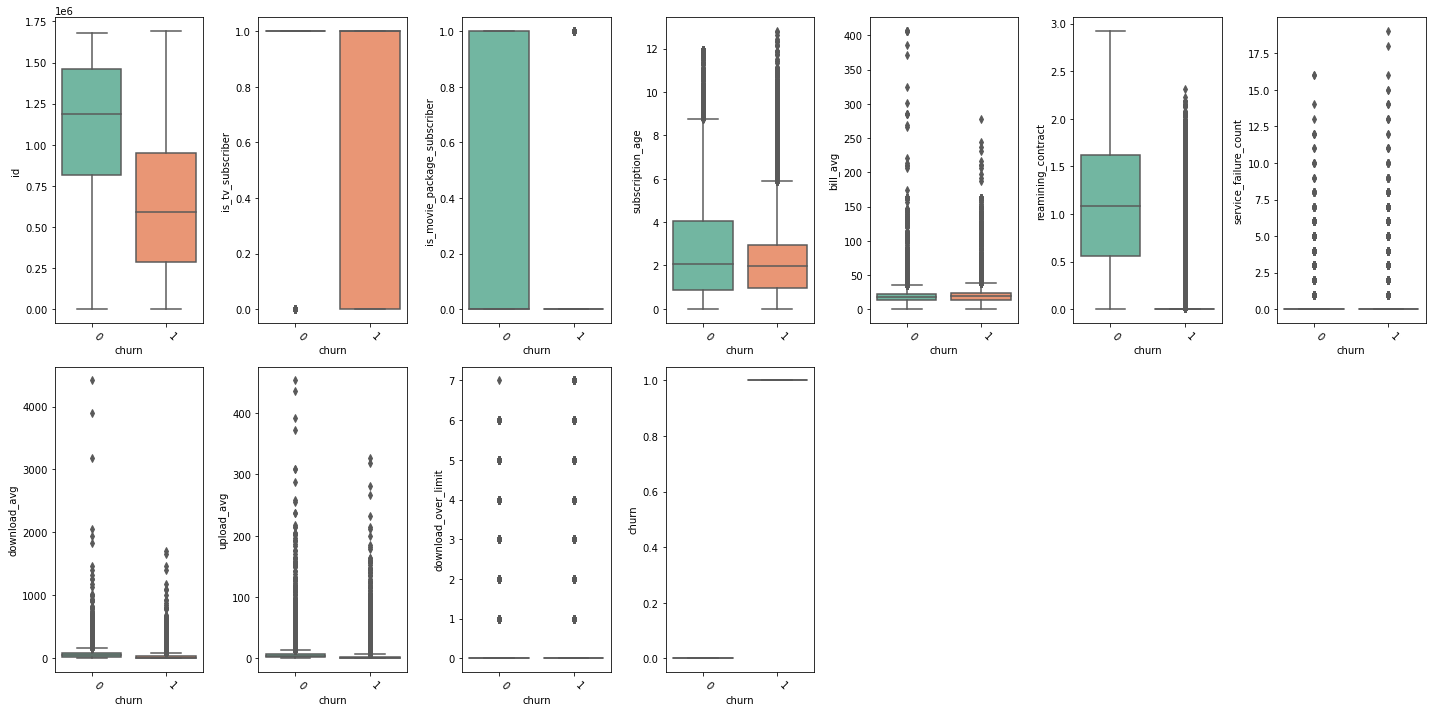

In [17]:
num = list(df.describe().columns)
plt.figure(figsize=(20,10))
for i in range(0, len(num)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df[num[i]], orient='v', x=df['churn'], palette="Set2")
    plt.xticks(rotation=-45, ha='left')
    plt.tight_layout()